In [1]:
import numpy as np
import scipy.io
import matplotlib.pyplot as plt

In [2]:
mat = scipy.io.loadmat('mnist_small.mat')
# X = mat.get('X')
X = mat['X']
np.random.seed(1)

0

1

2

3

4

5

6

7

8

9

10

11

12

13

14

15

16

17

18

19

20

21

22

23

24

25

26

27

28

29

30

31

32

33

34

35

36

37

38

39

40

41

42

43

44

45

46

47

48

49

50

51

52

53

54

55

56

57

58

59

60

61

62

63

64

65

66

67

68

69

70

71

72

73

74

75

76

77

78

79

80

81

82

83

84

85

86

87

88

89

90

91

92

93

94

95

96

97

98

99

100

101

102

103

104

105

106

107

108

109

110

111

112

113

114

115

116

117

118

119

120

121

122

123

124

125

126

127

128

129

130

131

132

133

134

135

136

137

138

139

140

141

142

143

144

145

146

147

148

149

150

151

152

153

154

155

156

157

158

159

160

161

162

163

164

165

166

167

168

169

170

171

172

173

174

175

176

177

178

179

180

181

182

183

184

185

186

187

188

189

190

191

192

193

194

195

196

197

198

199



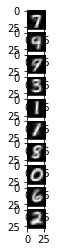

In [3]:
K = 10   
[N, D] = X.shape;

if K >= N:
    print('you are trying to make too many clusters!')

numIter = 200;  #% maximum number of iterations to run
batch_size = 100

#  initialize si2 dumbly
si2 = 1;

#  initialize pk uniformly
pk = np.ones(shape = (K, 1)) / K;

#  we initialize the means totally randomly
mu = np.random.rand(K, D)
new_mu = np.random.rand(K, D)
z = np.zeros(shape = (batch_size,K))
N_k = np.zeros(shape = (K, 1) )

for iter in range (numIter):
    lr = np.power(2 + iter, -0.55) #Set learning rate
    X_b = X[np.random.randint(N, size = batch_size)]
#    in the first step, we do assignments: each point is probabilistically
#    assigned to each center
    print(str(iter) + '\n')
    for n in range(batch_size):

        for k in range(K):
#        compute z(n,k) = log probability that the nth data point belongs
#        to cluster k
            z[n,k] = np.log(pk[k]) - (0.5/si2)*(np.linalg.norm(X_b[n] - mu[k]))**2


#     turn log probabilities into actual probabilities (we are working with logs for numeric stability)
        maxZ   = max(z[n])
        z[n]= np.exp(z[n] - maxZ - np.log(np.sum(np.exp(z[n] - maxZ))))
    for k in range(K):
        N_k[k] = 0
        for n in range(batch_size):
            N_k[k] = N_k[k] + z[n, k]
#      re-estimate pk
        pk[k] = (1 - lr)*pk[k] + lr*N_k[k]/batch_size

#     %  re-estimate the means
        new_mu[k] = np.zeros(shape = (1, D))
        for n in range(batch_size):
            new_mu[k] = new_mu[k] + z[n, k]*X_b[n]
        if(N_k[k] != 0):
            mu[k] = (1 - lr)*mu[k] + lr*new_mu[k]/N_k[k]

#     % TBD: re-estimate the variance
    new_si2 = 0
    for n in range(batch_size):
        for k in range(K):
            new_si2 = new_si2 + z[n, k]*(np.linalg.norm(X_b[n] - mu[k]) )**2
    si2 = (1 - lr)*si2 + lr*new_si2/(batch_size*D)
for k in range(K):
    mu2 = np.reshape(mu[k], (28, 28))
    plt.subplot(K,1,k + 1)
    plt.imshow(mu2, cmap = "gray")
#     plt.savefig("OnlineEM_GSoC_K="+str(K)+"_" + str(k) +".jpg")